In [164]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor #modelo random forest y #gradient boosted trees
from sklearn.svm import SVR #support vector regression
from sklearn.linear_model import Ridge,Lasso # regression with regularization: Rigde: is given by the l2-norm. Also known as Ridge Regression
from sklearn.kernel_ridge import KernelRidge #kernel ridge regression
from sklearn import preprocessing # para feature scaling
from sklearn.metrics import mean_squared_error, r2_score #métricas

In [165]:
%matplotlib inline

In [177]:
#import Data por industria
file= 'Dataframe_Exportaciones_mensuales_version2.csv'
datos=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
datos.iloc[:,:]

,Pais_comprador,Industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,2000,Enero,45624927.0
1,América Latina,Industrias Manufactureras,2000,Febrero,38402717.0
2,América Latina,Industrias Manufactureras,2000,Marzo,45714515.0
3,América Latina,Industrias Manufactureras,2000,Abril,53314410.0
4,América Latina,Industrias Manufactureras,2000,Mayo,68750896.0
5,América Latina,Industrias Manufactureras,2000,Junio,67485328.0
6,América Latina,Industrias Manufactureras,2000,Julio,62364404.0
7,América Latina,Industrias Manufactureras,2000,Agosto,60669012.0
8,América Latina,Industrias Manufactureras,2000,Septiembre,65432673.0
9,América Latina,Industrias Manufactureras,2000,Octubre,55449279.0


In [241]:
#import Data variables de entrada 
file= 'DFExportsvarentrada.csv'
variables_entrada=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')

In [168]:
#import vector de valores reales mensuales(420):
file= 'reales.csv'
reales=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')

In [169]:
#import DF proporciones 1
file= 'proporciones1.csv'
df_propor_1=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
df_propor_1.iloc[:,:]

,proporciones_mensuales
0,0.076938
1,0.078351
2,0.087281
3,0.087135
4,0.088418
5,0.088162
6,0.087518
7,0.079812
8,0.081313
9,0.082448


In [170]:
#import DF proporciones 2
file= 'proporciones2.csv'
df_propor_2=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
df_propor_2.iloc[:,:]

,proporciones_mensuales
0,0.073792
1,0.075542
2,0.084604
3,0.082880
4,0.085013
5,0.084930
6,0.083693
7,0.084204
8,0.085693
9,0.087220


In [178]:
#cambiar meses de STR a números y hacer el "Año" float:
datos.Mes=datos.Mes.map({'Enero':1,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9
                               ,'Octubre':10,'Noviembre':11,'Diciembre':12})
datos['Año']=datos['Año'].values.astype(np.float)

In [179]:
#reemplazar numeros de años para modificar que los años comienzen en agosto y terminen en julio, así se harán predicciones
#para el último año "17" siendo este agosto2016-julio2017

rows_toreplace=datos[(datos.Año==2000) & (datos.Mes<8)].index.values # filas a reemplazar año 0(enero2000-julio2000)
datos.loc[rows_toreplace,'Año']=0

for año0,año1,i in zip(range(2000,2017),range(2001,2018),range(1,18)):
    rows_toreplace=datos[(datos.Año==año0) & (datos.Mes>7)].index.values # filas a reemplazar del año (agosto-diciembre)
    datos.loc[rows_toreplace,'Año']=i 
    rows_toreplace=datos[(datos.Año==año1) & (datos.Mes<8)].index.values # filas a reemplazar del año (enero-julio)
    datos.loc[rows_toreplace,'Año']=i

In [180]:
datos

,Pais_comprador,Industria,Año,Mes,Monto
0,América Latina,Industrias Manufactureras,0.0,1,45624927.0
1,América Latina,Industrias Manufactureras,0.0,2,38402717.0
2,América Latina,Industrias Manufactureras,0.0,3,45714515.0
3,América Latina,Industrias Manufactureras,0.0,4,53314410.0
4,América Latina,Industrias Manufactureras,0.0,5,68750896.0
5,América Latina,Industrias Manufactureras,0.0,6,67485328.0
6,América Latina,Industrias Manufactureras,0.0,7,62364404.0
7,América Latina,Industrias Manufactureras,1.0,8,60669012.0
8,América Latina,Industrias Manufactureras,1.0,9,65432673.0
9,América Latina,Industrias Manufactureras,1.0,10,55449279.0


In [181]:
#agrupar datos para tener datos anuales 0:
datos_anuales_0=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_0=datos_anuales_0.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_0.head(30)

,Pais_comprador,Industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,8.445058e+08
1,América Latina,Industrias Manufactureras,2.0,8.663574e+08
2,América Latina,Industrias Manufactureras,3.0,8.790381e+08
3,América Latina,Industrias Manufactureras,4.0,9.397243e+08
4,América Latina,Industrias Manufactureras,5.0,8.517642e+08
5,América Latina,Industrias Manufactureras,6.0,9.959323e+08
6,América Latina,Industrias Manufactureras,7.0,1.403285e+09
7,América Latina,Industrias Manufactureras,8.0,2.205927e+09
8,América Latina,Industrias Manufactureras,9.0,1.825189e+09
9,América Latina,Industrias Manufactureras,10.0,2.365264e+09


In [182]:
#agrupar datos para tener datos anuales 1:
datos_anuales_1=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
datos_anuales_1=datos_anuales_1.query('Año>0').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
datos_anuales_1.head(30)

,Pais_comprador,Industria,Año,Monto
0,América Latina,Industrias Manufactureras,1.0,8.445058e+08
1,América Latina,Industrias Manufactureras,2.0,8.663574e+08
2,América Latina,Industrias Manufactureras,3.0,8.790381e+08
3,América Latina,Industrias Manufactureras,4.0,9.397243e+08
4,América Latina,Industrias Manufactureras,5.0,8.517642e+08
5,América Latina,Industrias Manufactureras,6.0,9.959323e+08
6,América Latina,Industrias Manufactureras,7.0,1.403285e+09
7,América Latina,Industrias Manufactureras,8.0,2.205927e+09
8,América Latina,Industrias Manufactureras,9.0,1.825189e+09
9,América Latina,Industrias Manufactureras,10.0,2.365264e+09


In [183]:
#funcion para modificiar variables categóricas

def categoricas(Data,tipo):
    if tipo==1: # variables pais comprador e industria se convierten a variables tipo dummie
        no_dummie=Data.iloc[:,2:]
        temp=pd.get_dummies(Data['Pais_comprador'])
        temp1=pd.get_dummies(Data['Industria'])
        datafinal=temp.join(temp1).join(no_dummie)
        datafinal=datafinal.reset_index(drop=True)
        
    if tipo==2: # variables pais comprador e industria se reemplazan por números 1,2,3....n asignados jerarquicamente por volumen de exportacion.
        Data.Pais_comprador=Data.Pais_comprador.replace({'América Latina':3,'Asia':4,'Europa':2,'Africa':5,'Oceanía':6,'América del Norte':1
                               ,'otros':7})
        Data.Industria=Data.Industria.replace({'Industrias Manufactureras':1,'Agricultura y Silvicultura':2,'Servicios y Productos no Clasificados':3
                                           ,'Industrias Extractivas':4,'Ganadería, Apicultura, Caza, Pesca':5})
        datafinal=Data
        
    if tipo==3: # variables pais comprador e industria se reemplazan por el promedio mensual de las exportaciones del segmento(solo conjunto train).
        data_train=datos.query('Año<16').reset_index(drop=True) #desde diciembre 2000 hasta 2012 
        datosporindus=data_train.groupby('Industria',as_index=True)['Monto'].mean()
        datosporpais=data_train.groupby('Pais_comprador',as_index=True)['Monto'].mean()
        
        Data.Pais_comprador=Data.Pais_comprador.map({'América Latina':datosporpais['América Latina'],'Asia':datosporpais['Asia']
                                                     ,'Europa':datosporpais['Europa'],'Africa':datosporpais['Africa']
                                                     ,'Oceanía':datosporpais['Oceanía'],'América del Norte':datosporpais['América del Norte']
                                                     ,'otros':datosporpais['otros']})
        Data.Industria=Data.Industria.map({'Industrias Manufactureras':datosporindus['Industrias Manufactureras']
                                           ,'Agricultura y Silvicultura':datosporindus['Agricultura y Silvicultura']
                                           ,'Servicios y Productos no Clasificados':datosporindus['Servicios y Productos no Clasificados']
                                           ,'Industrias Extractivas':datosporindus['Industrias Extractivas']
                                           ,'Ganadería, Apicultura, Caza, Pesca':datosporindus['Ganadería, Apicultura, Caza, Pesca']})
        datafinal=Data
        
    return(datafinal)

In [186]:
#mandar llamar funcion para modificar var categóricas y crear 3 datas frames(uno para cada tipo de conversión):
#data_mof_tipo1, data_mof_tipo2, data_mof_tipo3
tipo=2
data_mof_tipo2=categoricas(datos_anuales_0,tipo)
data_mof_tipo2

,Pais_comprador,Industria,Año,Monto
0,3,1,1.0,8.445058e+08
1,3,1,2.0,8.663574e+08
2,3,1,3.0,8.790381e+08
3,3,1,4.0,9.397243e+08
4,3,1,5.0,8.517642e+08
5,3,1,6.0,9.959323e+08
6,3,1,7.0,1.403285e+09
7,3,1,8.0,2.205927e+09
8,3,1,9.0,1.825189e+09
9,3,1,10.0,2.365264e+09


In [187]:
#funcion para facilitar el modelado de random forest
def modelfit(algorithm,datos,tipo,printFeatureImportance=True): 
        
    #dividir train,cross y tst
    data_train=datos.query('Año<17').reset_index(drop=True) #desde año 1 hasta 16
    data_test=datos.query('Año == 17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
                  
    #Fit the algorithm on the training data
    algorithm.fit(X_train,Y_train)
            
    #Predict test set:   
    dtest_predictions = algorithm.predict(X_test)
    dtest_predictions[dtest_predictions<0]=0
       
    #errores personalizados para test set:
    pd_dtest_predictions=pd.DataFrame(dtest_predictions,columns=['Prediccion'])
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dtest_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(dtest_predictions)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
    
    #Print model report:
    print ("\nModel Report")
    print ("Test mean_squared_error : %.4g" % mean_squared_error(Y_test.values, dtest_predictions))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test)
           
    #Print Feature Importance:
    if printFeatureImportance:
        predictors=list(X_train.columns.values)
        feat_imp = pd.Series(algorithm.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return pd_dtest_predictions,Y_test

C:\Users\Edu\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Model Report
Test mean_squared_error : 1.923e+18
Test error de la suma total de todas las predicciones : 0.1041
Test error del monto de cada prediccion(35) : 0.2305


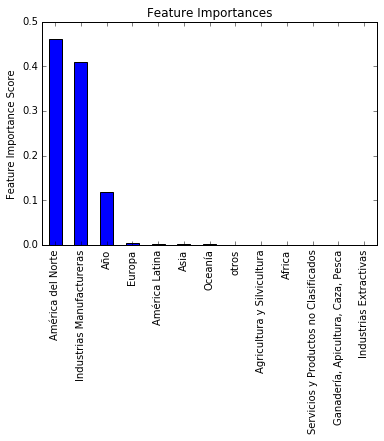

In [238]:
#crear modelo y mandar llamar funcion para modelado(random forest)

tipo=1 #para random forest funciono mejor el tipo 1
         
gbm0 = RandomForestRegressor(random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo1,tipo)

C:\Users\Edu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Test mean_squared_error : 2.051e+18
Test error de la suma total de todas las predicciones : 0.08852
Test error del monto de cada prediccion(35) : 0.2565


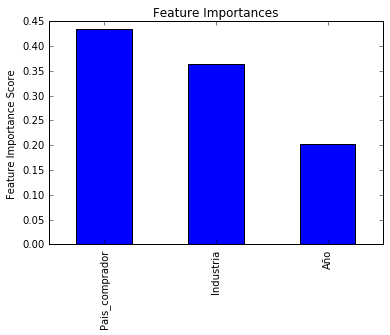

In [86]:
#crear modelo y mandar llamar funcion para modelado Gradient boosted trees:
#data:data_mof_tipo1, data_mof_tipo2, data_mof_tipo3

tipo=3 #para boosted trees funcionó mejor el tipo 3
            
gbm0 = GradientBoostingRegressor(loss='ls',random_state=1) # default parameters, gini by dedault 
resultados_fun,Y_test=modelfit(gbm0,data_mof_tipo3,tipo)

In [139]:
#funcion para modelar Regresion Kernel Ridge:
def kernel_ridge(datos,tipo,Alpha,pol_degree,g): 
    
    #dividir train,cross y tst:
    data_train=datos.query('Año<17').reset_index(drop=True) #desde año 1 hasta 16
    data_test=datos.query('Año==17').reset_index(drop=True) #ultimos 12 meses(año 17)
    
    if tipo==1:
        #separar "x,y"
        Y_train=data_train.iloc[:,13:14]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,13:14]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
        
    else:
        #separar "x,y"
        Y_train=data_train.iloc[:,3:4]
        X_train=data_train.ix[:, data_train.columns != 'Monto']

        Y_test=data_test.iloc[:,3:4]
        X_test=data_test.ix[:, data_test.columns != 'Monto']
    
    #soft normalization:
    
    columns_names=list(X_train.columns) #obtener nombres de columnas(variables) para no perderlos
    scaler = preprocessing.StandardScaler().fit(X_train) #sacar medias y varianzas del training set para futura normalización
    
    X_train=scaler.transform(X_train) #normalizar training set
    X_train=pd.DataFrame(X_train,columns=columns_names) #convertir de array a DataFrame
        
    X_test=scaler.transform(X_test) #normalizar test set
    X_test=pd.DataFrame(X_test,columns=columns_names) #convertir de array a DataFram
    
    #entrenar modelos con training data set
    
    Kridge_linear = KernelRidge(kernel='linear',alpha=Alpha).fit(X_train,Y_train)#Small positive values of alpha improve the conditioning 
    #of the problem and reduce the variance of the estimates
    Kridge_poly = KernelRidge(kernel='poly',degree=pol_degree,alpha=Alpha,gamma=g).fit(X_train,Y_train) 
    Kridge_rbf = KernelRidge(kernel='rbf',alpha=Alpha,gamma=g).fit(X_train,Y_train) #gamma es el coeficiente del kernel/gamma es el ancho del guassiano                                                  
    Kridge_laplacian= KernelRidge(kernel='laplacian',alpha=Alpha,gamma=g).fit(X_train,Y_train) # "C" is the penalization for error term
    
 
    # hacer predicciones de test data set::
    
    ########### predicciones con kernel lineal: #################
    
    #Predict test set:  
 
    resultados_lineal=Kridge_linear.predict(X_test)
    resultados_lineal[resultados_lineal<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lineal)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lineal)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test0=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test0=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Linear Kernel")
    print('\t alpha: %1.3f' %Alpha)
    print ("Test mean_squared_error Linear Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lineal))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test0)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test0)
    
    ########### predicciones con kernel polinomial:#################
    
    #Predict test set:  
 
    resultados_poly=Kridge_poly.predict(X_test)
    resultados_poly[resultados_poly<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_poly)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_poly)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test1=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test1=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Polynomial Kernel")
    print('\t Grado polinomio %1.3f' %pol_degree)
    print('\t Alpha: %1.3f' %Alpha)
    print('\t Gamma: %1.3f' %g)
    print ("Test mean_squared_error Polynomial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_poly))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test1)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test1)
     
    
    ########### predicciones con kernel Radial:#################
    
    #Predict test set: 
 
    resultados_rbf=Kridge_rbf.predict(X_test)
    resultados_rbf[resultados_rbf<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_rbf)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_rbf)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test2=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test2=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Radial Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Radial Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_rbf))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test2)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test2)
     
    ########### predicciones con kernel Laplacian:#################
    
    #Predict test set: 
 
    resultados_lapla=Kridge_laplacian.predict(X_test)
    resultados_lapla[resultados_lapla<0]=0
    
    #errores personalizados para test set Linear:
    pd_dcross_predictions=pd.DataFrame(resultados_lapla)
    diferencias_abs=pd.DataFrame(abs(Y_test.values-pd_dcross_predictions.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(resultados_lapla)
    sum_reales=sum(Y_test.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error_test3=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs_test3=sum_diferencias_abs/sum_reales #error del monto de cada prediccion
        
    #Print model report:
    print ("\nModel Report Laplacian Kernel")
    print('\t Alpha: %1.3f' %Alpha)
    print('\t gamma: %1.3f' %g)
    print ("Test mean_squared_error Laplacian Kernel: %.4g" % mean_squared_error(Y_test.values,resultados_lapla))
    print ("Test error de la suma total de todas las predicciones : %.4g" %porcentaje_error_test3)
    print ("Test error del monto de cada prediccion(35) : %.4g" %porcentaje_error_abs_test3)
            
    ###hacer data frame con los resultados de los 4 tipos de kernels:
    resultados_fun=pd.DataFrame(np.zeros((len(resultados_rbf),4)),columns=['Linear','Polynomial','Radial','Laplacian'])
        
    resultados_fun.loc[:,'Linear']=resultados_lineal
    resultados_fun.loc[:,'Polynomial']=resultados_poly
    resultados_fun.loc[:,'Radial']=resultados_rbf
    resultados_fun.loc[:,'Laplacian']=resultados_lapla
    
    return   Y_test,resultados_fun

In [245]:
tipo=3 #el mejor fue el tipo 3
Alpha=1
pol_degree=5
g=.2
Y_test,resultados_fun=kernel_ridge(data_mof_tipo3,tipo,Alpha,pol_degree,g)


Model Report Linear Kernel
	 alpha: 1.000
Test mean_squared_error Linear Kernel: 2.093e+19
Test error de la suma total de todas las predicciones : 0.2278
Test error del monto de cada prediccion(35) : 1.063

Model Report Polynomial Kernel
	 Grado polinomio 5.000
	 Alpha: 1.000
	 Gamma: 0.200
Test mean_squared_error Polynomial Kernel: 2.477e+18
Test error de la suma total de todas las predicciones : 0.05177
Test error del monto de cada prediccion(35) : 0.3278

Model Report Radial Kernel
	 Alpha: 1.000
	 gamma: 0.200
Test mean_squared_error Radial Kernel: 3.533e+18
Test error de la suma total de todas las predicciones : 0.2305
Test error del monto de cada prediccion(35) : 0.4292

Model Report Laplacian Kernel
	 Alpha: 1.000
	 gamma: 0.200
Test mean_squared_error Laplacian Kernel: 5.167e+18
Test error de la suma total de todas las predicciones : 0.1768
Test error del monto de cada prediccion(35) : 0.5536


In [189]:
#funcion para convertir las predicciones anuales a mensuales (de 35 a 420):
def anuales_a_mensuales(resultados,col,proporciones):
    
    df_propor_T=proporciones.T
    df_propor_T=df_propor_T.as_matrix()
    
    pd_resu=pd.DataFrame(resultados_fun.iloc[:,col])
    pd_resu=pd_resu.as_matrix()
    
    matrix_mult=pd.DataFrame(np.matmul(pd_resu,df_propor_T))
    matrix_mult_T=matrix_mult.T
    
    predicciones_mensuales=pd.DataFrame(pd.Series(matrix_mult_T.values.ravel('F')),columns=['Predicciones'])
    return predicciones_mensuales

In [247]:
#mandar llamar funcion para convertir predicciones anuales a mensuales:
col=1
predicciones_mensuales=anuales_a_mensuales(resultados_fun,col,df_propor_2)  #funciono mejor proporciones 2

In [192]:
#funcion para crear data frame de datos reales y predicciones agrupadas por año y mes(montos mensuales totales)
def DF_realesvspredicciones(variables_entrada,reales,predicciones):
    kr=predicciones.Predicciones.values
    kr=kr.reshape(-1,)
    ky=reales.values
    ky=ky.reshape(-1,)
    km=variables_entrada.Mes
    km=km.reshape(-1,)
    kyear=variables_entrada.Año
    kyear=kyear.reshape(-1,)
    
    d={'Año':kyear,'Mes':km,'Reales':ky,'Predicciones':kr}
    daataa=pd.DataFrame(d)
    dataagrupada=daataa.groupby(['Año','Mes'],as_index=False,sort=False).sum()
    return dataagrupada

In [248]:
#mandar llamar funcion para dataframe reales vs predicciones (montos mensuales totales):
reales_predicciones=DF_realesvspredicciones(variables_entrada,reales,predicciones_mensuales)
reales_predicciones

,Año,Mes,Predicciones,Reales
0,2016.0,8,3.544748e+09,3.825921e+09
1,2016.0,9,3.628797e+09,4.539046e+09
2,2016.0,10,4.064139e+09,4.277424e+09
3,2016.0,11,3.981309e+09,4.165294e+09
4,2016.0,12,4.083756e+09,3.816237e+09
5,2017.0,1,4.079798e+09,3.888871e+09
6,2017.0,2,4.020382e+09,4.147170e+09
7,2017.0,3,4.044925e+09,4.383166e+09
8,2017.0,4,4.116456e+09,4.289357e+09
9,2017.0,5,4.189798e+09,4.770543e+09


In [205]:
#funcion para errores mensuales:

def errores_mensuales(data):
    
    # errores mensuales:
    
    diferencias_abs=pd.DataFrame(abs(data.Reales.values-data.Predicciones.values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(data.Predicciones)
    sum_reales=sum(data.Reales)
    diferencia_total=sum_reales-sum_predicciones
    
    errores_mensuales=pd.DataFrame(diferencias_abs.Diferencias.values/reales_predicciones.Reales.values,columns=['error_anual_mensual'])
    #errores_mensuales=errores_mensuales.join(data.Mes)
    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 

    print("Error de la suma total de predicciones mensuales: %.4g" % porcentaje_error)
    print("Error de cada prediccion mensual: %.4g" % porcentaje_error_abs)
    
    return errores_mensuales

In [249]:
#mandar llamar funcion de errores mensuales: #proporciones 2
df_errores_mensuales=errores_mensuales(reales_predicciones)
df_errores_mensuales

Error de la suma total de predicciones mensuales: 0.05177
Error de cada prediccion mensual: 0.07145


,error_anual_mensual
0,0.073492
1,0.200538
2,0.049863
3,0.044171
4,0.070100
5,0.049096
6,0.030572
7,0.077168
8,0.040309
9,0.121736


In [229]:
#import DF errore mensuales desde datos mensuales para comparativo:
file= 'df_errores_mensuales_exp.csv'
errores_mensuales_mensuales=pd.read_csv(file,
                       header=0,
                       index_col=0,
                       sep=',',
                       parse_dates=False,
                       skip_blank_lines=True,
                 encoding='latin-1')
errores_mensuales_mensuales.iloc[:,:]

,error_mensual,Mes
0,0.086899,8
1,0.093080,9
2,0.031934,10
3,0.007364,11
4,0.086318,12
5,0.067477,1
6,0.014659,2
7,0.031024,3
8,0.011121,4
9,0.087322,5


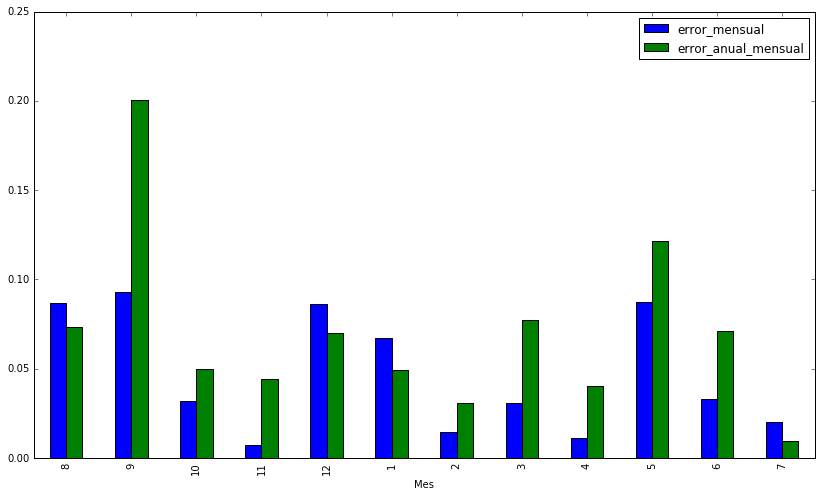

In [230]:
#unir los dos Df de errores mensuales y hacer plot
comparar_errores_mensuales=errores_mensuales_mensuales.join(df_errores_mensuales)
comparar_errores_mensuales=comparar_errores_mensuales.set_index('Mes')
comparar_errores_mensuales.plot(kind='bar',figsize=(14,8))

In [231]:
#funcion para graficar montos mensuales totales reales vs predecidos:

def graficar_monto_pred(data):
    resultados2=pd.DataFrame(data[['Reales','Predicciones']]).reset_index(drop=True)
    print(resultados2.plot(title='Datos reales vs prediccion',figsize=(14,8)))


Axes(0.125,0.125;0.775x0.775)


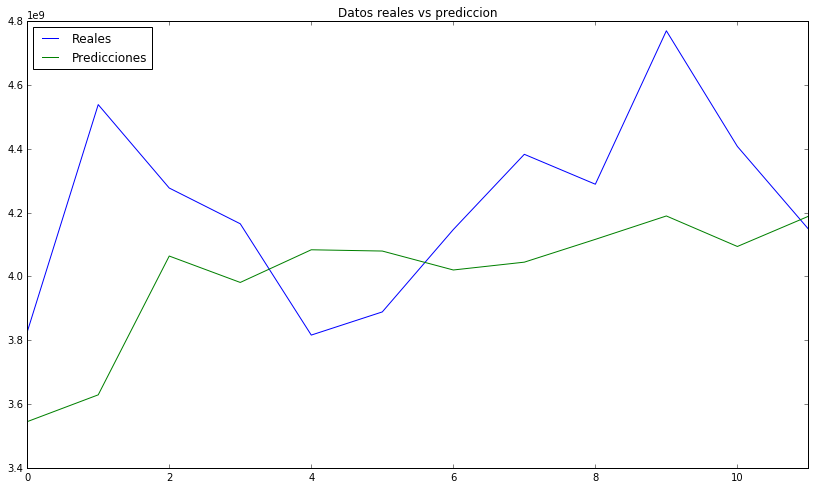

In [250]:
graficar_monto_pred(reales_predicciones)

In [233]:
#crear data frame "variables de entrada" y juntarlo con Reales y predicciones:
variables_entrada=datos.groupby(['Pais_comprador','Industria','Año'],as_index=False,sort=False)['Monto'].sum()
variables_entrada=variables_entrada.query('Año==17').reset_index(drop=True)#eliminar año "0" (enero2000-julio2000)
variables_entrada=variables_entrada.ix[:,variables_entrada.columns!='Año']
dataframe_final=variables_entrada.join(resultados_fun)
dataframe_final

,Pais_comprador,Industria,Monto,Linear,Polynomial,Radial,Laplacian
0,América Latina,Industrias Manufactureras,2.397102e+09,3.278390e+09,3.176379e+09,2.749228e+09,3.179217e+09
1,América Latina,Industrias Extractivas,1.418405e+07,0.000000e+00,4.250694e+07,4.444307e+07,2.359133e+07
2,América Latina,Agricultura y Silvicultura,6.301164e+07,0.000000e+00,6.270684e+07,8.637200e+07,8.170433e+07
3,América Latina,Servicios y Productos no Clasificados,2.123811e+07,0.000000e+00,4.383870e+07,4.711240e+07,2.650991e+07
4,América Latina,"Ganadería, Apicultura, Caza, Pesca",2.599100e+04,0.000000e+00,4.178516e+07,4.300190e+07,2.274093e+07
5,Asia,Industrias Manufactureras,2.346391e+09,3.135343e+09,2.034274e+09,2.052879e+09,2.564502e+09
6,Asia,Industrias Extractivas,6.842395e+06,0.000000e+00,2.725748e+07,1.454014e+07,0.000000e+00
7,Asia,Agricultura y Silvicultura,6.796650e+07,0.000000e+00,3.875160e+07,4.594795e+07,1.923833e+07
8,Asia,Servicios y Productos no Clasificados,2.547709e+07,0.000000e+00,2.803076e+07,1.653916e+07,0.000000e+00
9,Asia,"Ganadería, Apicultura, Caza, Pesca",1.700000e+02,0.000000e+00,2.683748e+07,1.346090e+07,0.000000e+00


In [236]:
#funcion para errores por segmentos(pais,industria,año,mes)

def errores(data,col,pais,industria,s_pais=True,s_industria=True):
    
    # totales:
    
    diferencias_abs=pd.DataFrame(abs(data.Monto.values-data.iloc[:,col].values),columns =['Diferencias'])
    sum_diferencias_abs=sum(diferencias_abs.Diferencias)
    sum_predicciones=sum(data.iloc[:,col])
    sum_reales=sum(data.Monto)
    diferencia_total=sum_reales-sum_predicciones

    porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
    porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
    
    d={'Total_Real':sum_reales,'Total_Predicciones':sum_predicciones}
    pd_plot=pd.DataFrame(d,index=['Total'])
        
    titulo='Montos totales anuales'
    print("Monto total Anual:")
    print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
    print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
    print(pd_plot.plot(title=titulo,kind='bar',figsize=(14,8)))
    print(pd_plot)
    
    if s_pais & s_industria:
        
        query=data[(data.Pais_comprador==pais[0]) & (data.Industria==industria[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=pais[0]+'-'+industria[0]+'--'+'Anual'
        print(pais,industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)
                     
    if s_pais:
        
        query=data[(data.Pais_comprador==pais[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=pais[0]+'--'+'Anual'
        query=query.set_index('Industria')
        print(pais,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)
        
    if s_industria:
        
        query=data[(data.Industria==industria[0])].reset_index(drop=True)

        diferencias_abs=pd.DataFrame(abs(query.Monto.values-query.iloc[:,col].values),columns =['Diferencias'])
        sum_diferencias_abs=sum(diferencias_abs.Diferencias)
        sum_predicciones=sum(query.iloc[:,col])
        sum_reales=sum(query.Monto)
        diferencia_total=sum_reales-sum_predicciones

        porcentaje_error=abs(diferencia_total/sum_reales) #error de la suma total de todas las predicciones
        porcentaje_error_abs=sum_diferencias_abs/sum_reales #error del monto de cada prediccion 
        
        titulo=industria[0]+'--'+'Anual'
        query=query.set_index('Pais_comprador')
        print(industria,":")
        print("Error de la suma total de predicciones: %.4g" % porcentaje_error)
        print("Error de cada prediccion : %.4g" % porcentaje_error_abs)
        print(query.plot(title=titulo,kind='bar',figsize=(14,8)))
        print(query)

Monto total Anual:
Error de la suma total de predicciones: 0.05177
Error de cada prediccion : 0.3278
Axes(0.125,0.125;0.775x0.775)
       Total_Predicciones    Total_Real
Total        4.803699e+10  5.065973e+10
['América del Norte'] ['Industrias Manufactureras'] :
Error de la suma total de predicciones: 0.1527
Error de cada prediccion : 0.1527
Axes(0.125,0.125;0.775x0.775)
      Pais_comprador                  Industria         Monto        Linear  \
0  América del Norte  Industrias Manufactureras  3.211777e+10  7.249049e+09   

     Polynomial        Radial     Laplacian  
0  3.702351e+10  2.478159e+10  2.164092e+10  
['América del Norte'] :
Error de la suma total de predicciones: 0.1392
Error de cada prediccion : 0.2077
Axes(0.125,0.125;0.775x0.775)
                                          Pais_comprador         Monto  \
Industria                                                                
Industrias Manufactureras              América del Norte  3.211777e+10   
Industrias Extra

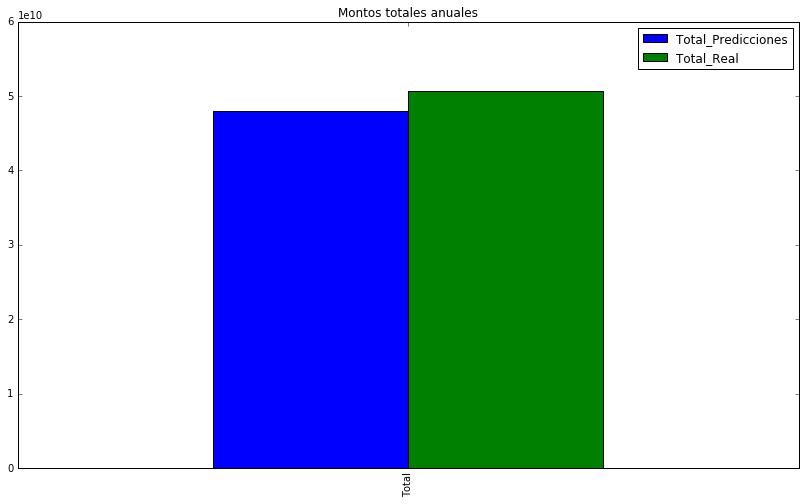

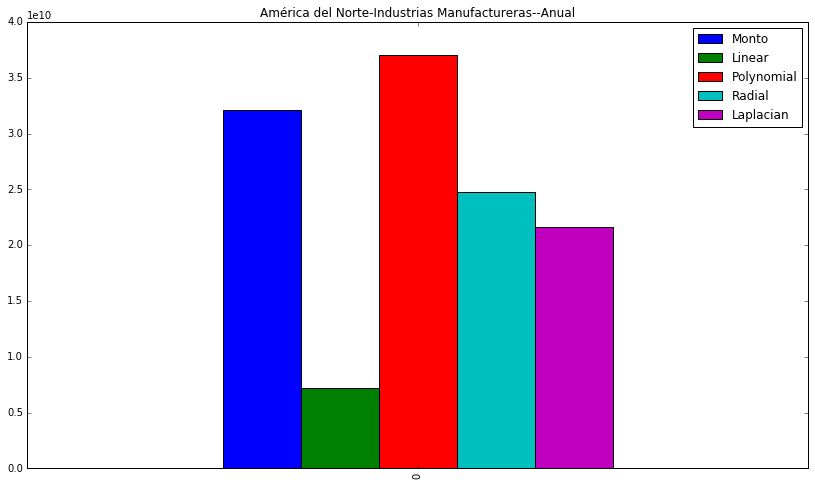

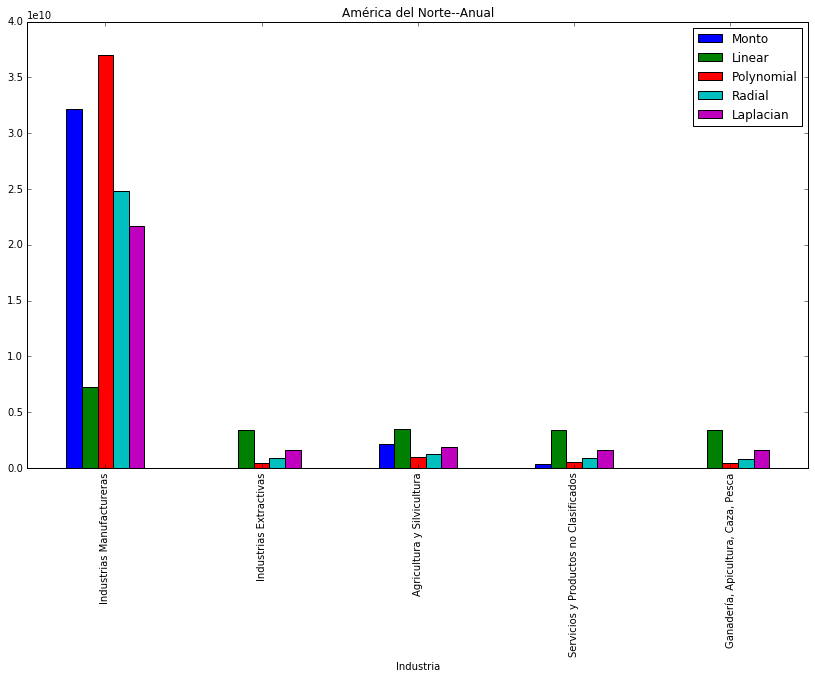

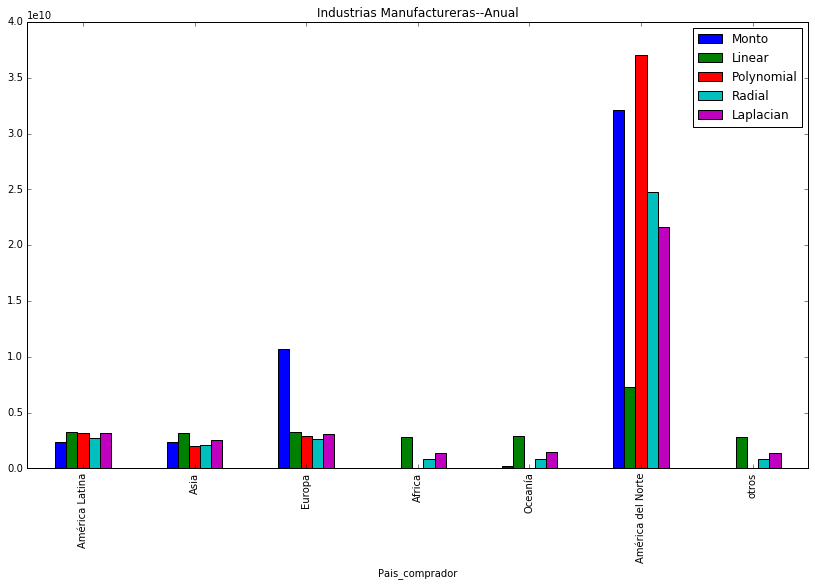

In [237]:
#mandar llamar funcion de errores por segmentos

#lista paises: América Latina,Asia,Europa,Africa,Oceanía,América del Norte,otros
#lista industrias: Industrias Manufactureras//Agricultura y Silvicultura//Servicios y Productos no Clasificados 
                ## Industrias Extractivas//Ganadería, Apicultura, Caza, Pesca
col=4
pais=['América del Norte']
industria=['Industrias Manufactureras']

errores(dataframe_final,col,pais,industria)